In [58]:
import numpy as np
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
%matplotlib inline

# 假設你有一個文檔集合
documents = [
    "太空探索是人類的終極目標之一，科學家們不斷研究宇宙，希望找到其他星球上的生命跡象。",
    "天文學家使用望遠鏡觀察星星和行星，他們研究宇宙中的運行和現象。",
    "宇航員是那些有幸參加太空探索的人，他們在太空站中進行科學實驗並研究宇宙的秘密。",
    "宇宙是如此神秘，充滿未知，科學家們的研究和探索將繼續揭示宇宙的奧秘。",
    "醫學是一門嚴肅而關鍵的學科，醫生們不斷努力維護人類的健康，探索各種疾病和治療方法的研究。",
    "藥物和治療方法的發展是醫學的一個重要方面，藥劑師們負責確保藥物的安全和有效使用。",
    "手術醫生在手術室中進行複雜的手術程序，拯救生命並改善患者的生活質量。",
    "醫學研究不斷取得突破，對於罕見疾病的治療和預防措施的發現為患者帶來了新的希望。",
]


In [59]:
# 使用jieba進行斷詞
segmented_documents = [" ".join(jieba.cut(document)) for document in documents]

In [60]:
# 創建TF-IDF向量化器
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(segmented_documents)

# # 顯示結果
# print(vectorizer.get_feature_names_out())
# print(tfidf_matrix.toarray())

In [61]:
# 創建LSI模型
num_topics = 2  # 指定要保留的主題數
lsa = TruncatedSVD(n_components=num_topics)
lsa_matrix = lsa.fit_transform(tfidf_matrix)

# 顯示LSI模型的主題
print("LSI模型的主題：")
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa.components_):
    top_terms_idx = topic.argsort()[-5:]  # 找到每個主題中最重要的5個詞語
    top_terms = [terms[idx] for idx in top_terms_idx]
    print(f"主題 {i+1}: {', '.join(top_terms)}")

# 顯示文檔在主題空間中的表示
print("\n文檔在主題空間中的表示：")
for i, document in enumerate(documents):
    print(f"文檔 {i+1}: {lsa_matrix[i]}")

LSI模型的主題：
主題 1: 科學家們, 不斷, 探索, 研究, 宇宙
主題 2: 不斷, 方法, 疾病, 醫學, 治療

文檔在主題空間中的表示：
文檔 1: [ 0.62046398 -0.14757151]
文檔 2: [ 0.34547554 -0.29690448]
文檔 3: [ 0.4706588  -0.42834706]
文檔 4: [ 0.49185913 -0.4190233 ]
文檔 5: [0.52227275 0.4894337 ]
文檔 6: [0.24038074 0.47269218]
文檔 7: [ 0.15468293 -0.01625183]
文檔 8: [0.46314413 0.50764261]


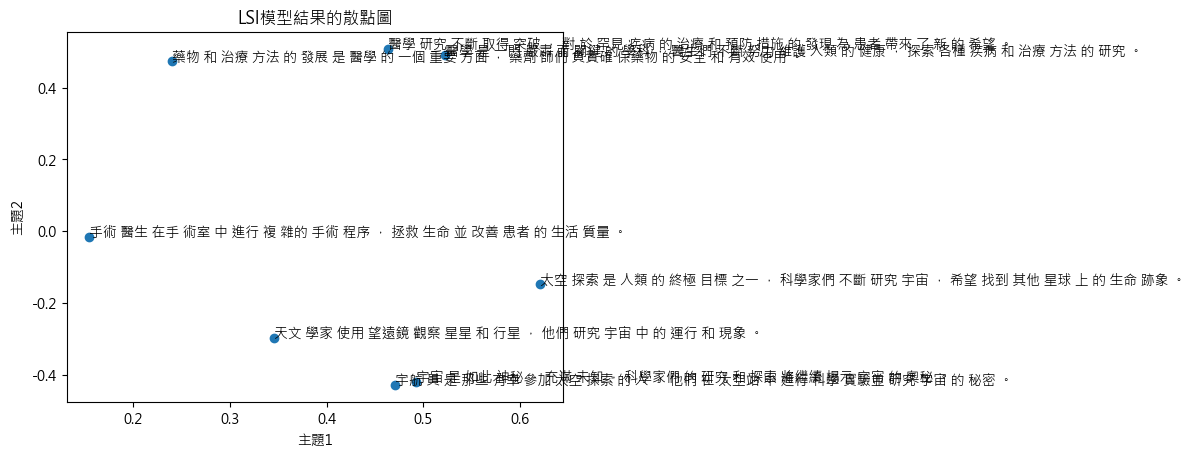

In [62]:
# 可視化LSI模型的結果
plt.scatter(lsa_matrix[:, 0], lsa_matrix[:, 1])
plt.xlabel("主題1")
plt.ylabel("主題2")
plt.title("LSI模型結果的散點圖")
for i, txt in enumerate(segmented_documents):
    plt.annotate(txt, (lsa_matrix[i, 0], lsa_matrix[i, 1]))
plt.show()